## Understanding Regression in Machine Learning

Regression in machine learning is a type of predictive modeling technique. It investigates the relationship between a dependent (target) variable and one or more independent (predictor) variables. The goal is to model the underlying relationship between these variables so that, given new data for the independent variables, we can accurately predict the dependent variable. Let's briefly overview the concept and its application in machine learning without diving deep into specific models:

### Purpose of Regression

The primary purpose of regression is to predict continuous values. For instance, predicting house prices, temperature, sales amounts, and more, based on historical data and the relationships identified between variables.

### How It Works

Regression works by fitting a line or curve (depending on the model) to the data points in a way that makes the distance from each data point to the line (known as the error) as small as possible. This line or curve represents the predicted relationship between the independent and dependent variables.

### Types of Regression

There are several types of regression models, each with its own mathematical approach to modeling the data:

- **Linear Regression:** Assumes a linear relationship between the dependent and independent variables. It fits a straight line to the data.
- **Polynomial Regression:** Extends linear regression to model non-linear relationships by using higher-degree polynomials.
- **Ridge and Lasso Regression:** These are variations of linear regression that incorporate regularization to prevent overfitting by penalizing large coefficients.
- **ElasticNet Regression:** Combines features of both Ridge and Lasso regression, using a mix of L1 and L2 regularization.
- **Support Vector Regression (SVR):** Adapts the Support Vector Machine algorithm for regression, focusing on fitting the error within a certain threshold.
- **Decision Tree Regression:** Uses a decision tree to model non-linear relationships by splitting the data into subsets based on the feature values.
- **Gradient Boosting Regression:** An ensemble technique that builds multiple models sequentially, each new model correcting errors made by the previous ones.

### Key Considerations

- **Model Selection:** Choosing the right model depends on the nature of the data and the relationship between variables. Some datasets are best modeled with a simple linear approach, while others require more complex non-linear models.
- **Overfitting vs. Underfitting:** A key challenge in regression is balancing model complexity with predictive accuracy. Overfitting occurs when the model is too complex, capturing noise instead of the underlying pattern. Underfitting happens when the model is too simple to capture the relationship between variables.
- **Evaluation Metrics:** Metrics like MAE, MSE, RMSE, and R^2 score are used to evaluate the performance of regression models, providing insights into their accuracy and predictive capabilities.

In machine learning, regression is a fundamental technique for predictive analysis, offering a wide range of models to fit the diverse nature of data and prediction tasks.


# Boston Housing Dataset Overview

The Boston Housing dataset contains information about various towns and suburbs in the Boston Standard Metropolitan Statistical Area (SMSA) as of 1970. This dataset is widely used in machine learning for regression analysis and predictive modeling. The data includes several attributes for each area, sourced from the UCI Machine Learning Repository.

## Attributes:

- `CRIM`: Per capita crime rate by town
- `ZN`: Proportion of residential land zoned for lots over 25,000 sq.ft.
- `INDUS`: Proportion of non-retail business acres per town
- `CHAS`: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- `NOX`: Nitric oxides concentration (parts per 10 million)
- `RM`: Average number of rooms per dwelling
- `AGE`: Proportion of owner-occupied units built prior to 1940
- `DIS`: Weighted distances to five Boston employment centers
- `RAD`: Index of accessibility to radial highways
- `TAX`: Full-value property-tax rate per \$10,000
- `PTRATIO`: Pupil-teacher ratio by town
- `B`: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- `LSTAT`: % lower status of the population
- `MEDV`: Median value of owner-occupied homes in $1000s

For more detailed information and data download, visit the [UCI Machine Learning Repository Housing Dataset page](https://archive.ics.uci.edu/ml/datasets/Housing).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [2]:
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

df = pd.read_csv('./data/housing.csv',
                 header=None,
                 delimiter=r"\s+",
                 names=column_names)

In [3]:
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
198,0.03768,80.0,1.52,0,0.404,7.274,38.3,7.3090,2,329.0,12.6,392.20,6.62,34.6
317,0.24522,0.0,9.90,0,0.544,5.782,71.7,4.0317,4,304.0,18.4,396.90,15.94,19.8
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
456,4.66883,0.0,18.10,0,0.713,5.976,87.9,2.5806,24,666.0,20.2,10.48,19.01,12.7
457,8.20058,0.0,18.10,0,0.713,5.936,80.3,2.7792,24,666.0,20.2,3.50,16.94,13.5


## Understanding data

In [4]:
df.shape

(506, 14)

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

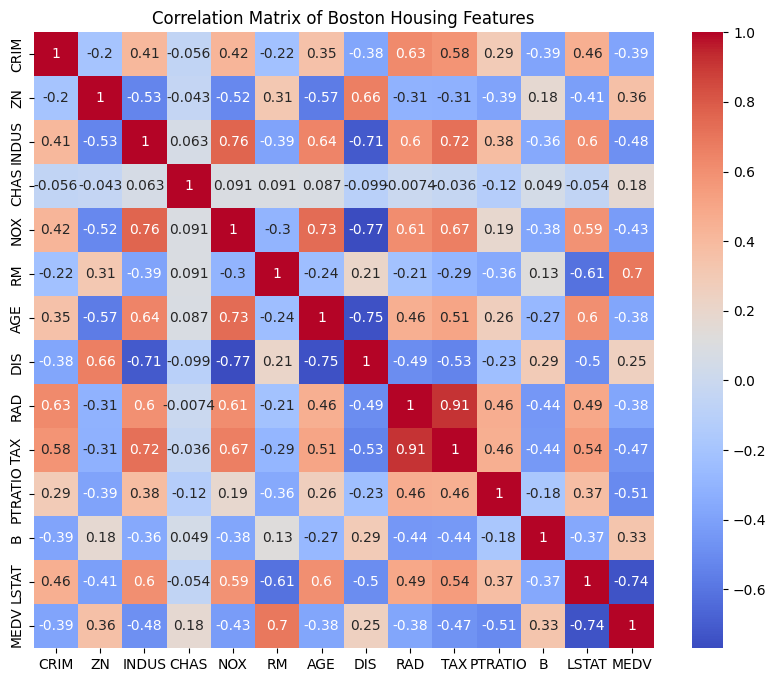

In [7]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Boston Housing Features')
plt.show()

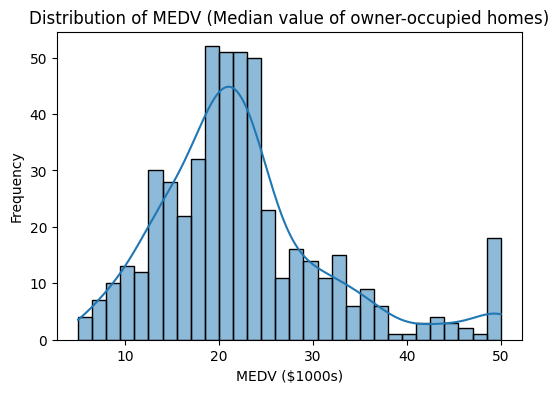

In [8]:
# Distribution of target variable (MEDV)
plt.figure(figsize=(6, 4))
sns.histplot(df['MEDV'], bins=30, kde=True)
plt.title('Distribution of MEDV (Median value of owner-occupied homes)')
plt.xlabel('MEDV ($1000s)')
plt.ylabel('Frequency')
plt.show()

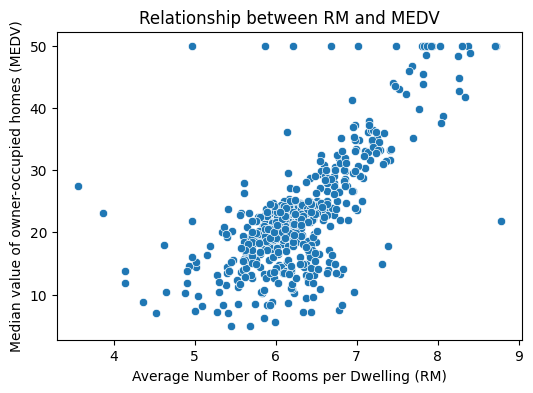

In [9]:
# Relationship between RM (average number of rooms) and MEDV
plt.figure(figsize=(6, 4))
sns.scatterplot(x='RM', y='MEDV', data=df)
plt.title('Relationship between RM and MEDV')
plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Median value of owner-occupied homes (MEDV)')
plt.show()

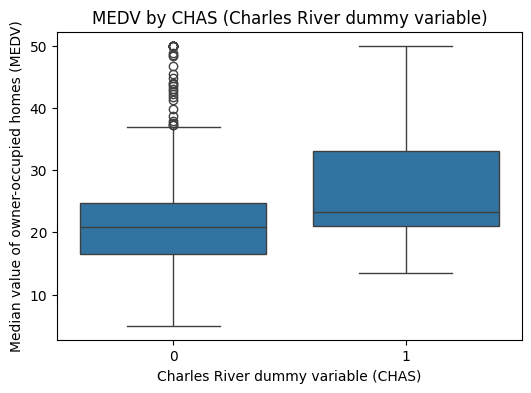

In [10]:
# Examining the effect of CHAS (Charles River dummy variable) on MEDV
plt.figure(figsize=(6, 4))
sns.boxplot(x='CHAS', y='MEDV', data=df)
plt.title('MEDV by CHAS (Charles River dummy variable)')
plt.xlabel('Charles River dummy variable (CHAS)')
plt.ylabel('Median value of owner-occupied homes (MEDV)')
plt.show()

## Overview of Regression Models

In our exploration of regression models, we will employ a variety of approaches, each with its unique characteristics and applications. Let's take a closer look at each model used in our analysis:

### Linear Regression

Linear Regression is one of the simplest and most widely used statistical techniques for predictive modeling. It attempts to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. The coefficients of the equation are derived to minimize the difference between the observed and predicted values.

**Key Points:**
- Assumes a linear relationship between input and output variables.
- Sensitive to outliers.

### Ridge Regression

Ridge Regression, also known as Tikhonov regularization, is a technique used to analyze multiple regression data that suffer from multicollinearity. By introducing a regularization term (alpha), it reduces the model complexity by penalizing large coefficients, thus mitigating the problem of overfitting.

**Key Points:**
- Adds a penalty equal to the square of the magnitude of coefficients.
- Tries to balance the trade-off between bias and variance in the model.

### Lasso Regression

Lasso Regression (Least Absolute Shrinkage and Selection Operator) is similar to Ridge Regression but with a twist. Instead of squaring the coefficients, Lasso regression penalizes the absolute size of the coefficients. As a result, it can completely eliminate some coefficients, effectively performing variable selection.

**Key Points:**
- Can lead to sparse models with few coefficients; some coefficients can become zero and eliminated from the model.
- Useful in some contexts due to its tendency to prefer simpler models that may generalize better.

### ElasticNet

ElasticNet is a middle ground between Ridge Regression and Lasso Regression. It combines the penalties of both methods, incorporating both the L1 and L2 regularization terms. This makes it particularly useful when dealing with highly correlated data.

**Key Points:**
- Combines the regularization of Ridge and Lasso, offering a blend of feature elimination and coefficient shrinkage.
- Can outperform Lasso and Ridge in certain scenarios, especially when dealing with highly correlated features.

### Support Vector Regression (SVR)

Support Vector Regression extends the concept of Support Vector Machines (SVM) to regression problems. It tries to fit the error within a certain threshold and can be used both for linear and non-linear data, thanks to the kernel trick.

**Key Points:**
- Provides flexibility in the choice of penalties and loss functions.
- Can handle both linear and non-linear data efficiently.

### Decision Tree Regressor

A Decision Tree Regressor uses a decision tree to go from observations about an item to conclusions about the item's target value. It is a non-linear model, capable of capturing complex relationships between inputs and outputs.

**Key Points:**
- Non-parametric, making no assumptions about the shape of data.
- Can easily overfit the training data if not carefully tuned.

### Gradient Boosting Regressor

Gradient Boosting Regressor is an ensemble learning technique that builds models sequentially, each new model correcting errors made by previous ones. It combines multiple weak predictive models to create a strong model.

**Key Points:**
- Highly flexible, capable of capturing complex interactions between features.
- Can be prone to overfitting but generally performs very well on a wide range of problems.

Each of these models brings a unique approach to understanding and predicting data. By comparing their performance, we can select the most suitable model for our specific dataset and problem.


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'MEDV' is the target variable and the rest are predictors
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

## Data normalization

For the Boston Housing dataset, normalization can help improve model performance, especially for algorithms that are sensitive to the scale of the data, such as Support Vector Machines, K-nearest Neighbors, and models that use gradient descent for optimization. Two common normalization techniques are:

- **Min-Max Scaling**: This technique rescales the data to a fixed range, usually 0 to 1. It's useful when you need to normalize the range of the features.

- **Standardization (Z-score Normalization)**: This technique rescales the data so that it has a mean of 0 and a standard deviation of 1. It's useful in many scenarios, especially when the algorithm assumes that the input features are normally distributed.

For the Boston Housing dataset, standardization is often preferred since it deals well with features that have different units of measurement and scales. Here’s how you can apply standardization to the dataset:


In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame for convenience
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

__Attention: The above normalization is not used in the rest of the notebook!__

## Understanding MAE, MSE, RMSE, and R^2

When evaluating the performance of regression models, we often rely on several key metrics to understand how well our model is predicting. Let's refresh on what these metrics mean:

### Mean Absolute Error (MAE)

MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It's calculated as the average of the absolute differences between the predicted values and the actual values. This metric gives an idea of how wrong the predictions are; a value of 0 indicates no error or perfect predictions. Since it measures the average error magnitude, it's easy to interpret.

**Formula:** $$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

Where:
- $y_i$ is the actual value,
- $\hat{y}_i$ is the predicted value,
- $n$ is the number of observations.

### Mean Squared Error (MSE)

MSE is similar to MAE but squares the difference between the predicted and actual values before averaging them. The squaring part places more emphasis on larger errors compared to smaller ones, making MSE sensitive to outliers. MSE is useful when large errors are particularly undesirable.

**Formula:** $$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

### Root Mean Squared Error (RMSE)

RMSE is the square root of the mean squared error. Taking the square root brings the units back to the original units of the output variable and somewhat reduces the sensitivity to large errors. Like MSE, it gives more weight to larger errors, but its units are easier to understand since they match the target variable's units.

**Formula:** $$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

### R-Squared (R^2)

R^2, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance for the dependent variable that's explained by the independent variable(s) in a regression model. It provides an indication of the goodness of fit of a model. An R^2 of 1 indicates that the regression predictions perfectly fit the data. Values of R^2 outside the range 0 to 1 are possible in cases of extrapolation and should be interpreted with caution.

**Formula:** $$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

Where:
- $\bar{y}$ is the mean of the actual values.

In summary, MAE, MSE, and RMSE are metrics that directly measure the average error in the predictions, with MSE and RMSE giving more penalty to larger errors. R^2 provides a measure of how well future samples are likely to be predicted by the model. Understanding these metrics helps in evaluating and comparing regression models effectively.


## Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

# Initializing and fitting the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 3.1890919658879326
Mean Squared Error (MSE): 24.29111947497418
Root Mean Squared Error (RMSE): 4.928602182665403
R^2 Score: 0.6687594935356229


## Ridge Regression

In [14]:
from sklearn.linear_model import Ridge

# Initialize and train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict on test set
y_pred = ridge_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 3.1329474278055347
Mean Squared Error (MSE): 24.477191227708662
Root Mean Squared Error (RMSE): 4.947442897872461
R^2 Score: 0.6662221670168521


## Lasso Regression

In [15]:
from sklearn.linear_model import Lasso

# Initialize and train Lasso Regression model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Predict on test set
y_pred = lasso_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 3.2535397673681636
Mean Squared Error (MSE): 24.409489761299707
Root Mean Squared Error (RMSE): 4.940596093721861
R^2 Score: 0.6671453631686304


## ElasticNet

In [16]:
from sklearn.linear_model import ElasticNet

# Initialize and train ElasticNet model
elastic_net_model = ElasticNet(random_state=42)
elastic_net_model.fit(X_train, y_train)

# Predict on test set
y_pred = elastic_net_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 3.244000641536975
Mean Squared Error (MSE): 23.968733210204793
Root Mean Squared Error (RMSE): 4.89578729217322
R^2 Score: 0.6731556429073877


## Support Vector Regression (SVR)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

# Initialize and train Support Vector Regression model with feature scaling
svr_model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svr_model.fit(X_train, y_train)

# Predict on test set
y_pred = svr_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 2.7398756050247868
Mean Squared Error (MSE): 25.600625317621695
Root Mean Squared Error (RMSE): 5.059706050515356
R^2 Score: 0.6509027052149569


## Why Feature Scaling for SVR?

Feature scaling was performed before training the Support Vector Regression (SVR) model due to the nature of the algorithm itself. SVR, like many machine learning algorithms, is sensitive to the range of input features. Here are the reasons why feature scaling is essential for SVR:

- **Sensitivity to Feature Scales**: SVR uses the Euclidean distance between data points in its objective function. If one feature has a very large range compared to others, it will dominate the distance calculation, leading to skewed results. Scaling ensures that all features contribute equally to the distance calculation.

- **Optimization Efficiency**: The SVR model's optimization algorithms converge faster when features are on similar scales. Without scaling, features with larger ranges might slow down the training process and lead to longer convergence times or convergence to suboptimal solutions.

- **Regularization Impact**: SVR often includes regularization terms to prevent overfitting. The regularization term's effectiveness can be disproportionately affected by features of different scales, making it crucial to scale the features for balanced regularization across all dimensions.

## Decision Tree Regressor

In [18]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict on test set
y_pred = tree_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 2.394117647058824
Mean Squared Error (MSE): 10.416078431372549
Root Mean Squared Error (RMSE): 3.2273949915330395
R^2 Score: 0.8579634380978161


## Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict on test set
y_pred = random_forest_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 2.0395392156862746
Mean Squared Error (MSE): 7.901513892156864
Root Mean Squared Error (RMSE): 2.8109631609391226
R^2 Score: 0.8922527442109116


## Gradient Boosting Regressor

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train Gradient Boosting Regressor
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Predict on test set
y_pred = gradient_boosting_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 1.9122427713612915
Mean Squared Error (MSE): 6.208861361528038
Root Mean Squared Error (RMSE): 2.491758688462436
R^2 Score: 0.9153342280466539


## Putting everything together!

The following 3 cells are used to compare the regression models we build before. It achieves this through several steps:

1. **Define Models:** We initialize a dictionary named `models` containing multiple regression models, including Linear Regression, Ridge, Lasso, ElasticNet, Support Vector Regression (SVR), Decision Tree, Random Forest Regressor, and Gradient Boosting Regressor. The SVR model is specifically scaled using `StandardScaler` to standardize features by removing the mean and scaling to unit variance.

2. **Evaluate Models:** The code loops through each model, fitting them on training data (`X_train`, `y_train`) and predicting outcomes on test data (`X_test`). It then calculates Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and the R^2 score for each model, storing these metrics in a `metrics_results` dictionary.

3. **Visualization:** Two plots are generated to visually compare the models' performances. The first plot shows MAE, MSE, and RMSE for each model, providing insights into their prediction errors. The second plot focuses on the R^2 score, which indicates how well the models capture the variance of the target variable. Bar plots are used for clear, comparative visualization.

In [21]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'SVR': make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest Regresor': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Placeholder for metric results
metrics_results = {'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'R2': []}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics_results['Model'].append(name)
    metrics_results['MAE'].append(mean_absolute_error(y_test, y_pred))
    metrics_results['MSE'].append(mean_squared_error(y_test, y_pred))
    metrics_results['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred)))
    metrics_results['R2'].append(r2_score(y_test, y_pred))

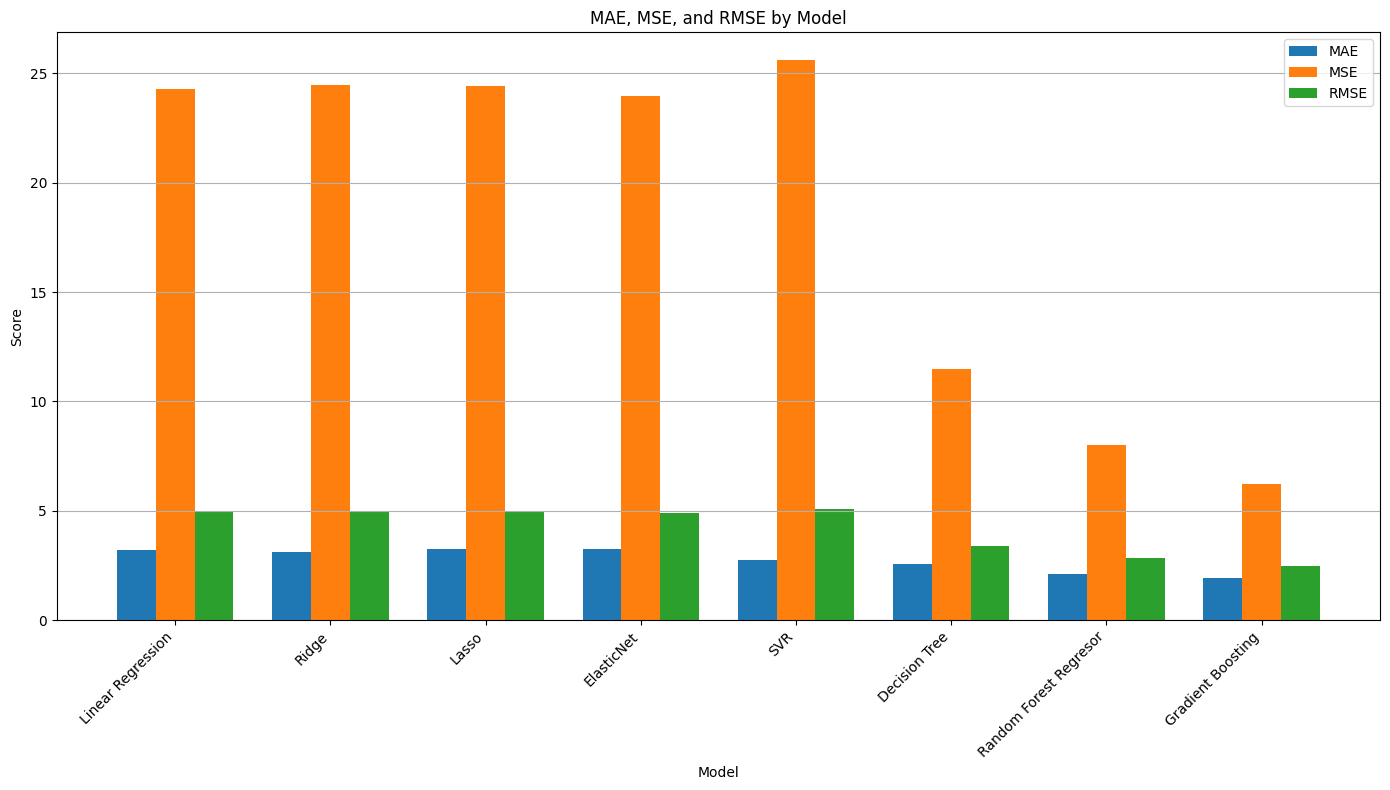

In [22]:
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.25
index = np.arange(len(models))

for i, metric in enumerate(['MAE', 'MSE', 'RMSE']):
    ax.bar(index + i * bar_width,
           metrics_results[metric],
           bar_width,
           label=metric)

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('MAE, MSE, and RMSE by Model')
ax.set_xticks(index +
              bar_width)  # Adjusted to center ticks among the group of bars
ax.set_xticklabels(metrics_results['Model'], rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.grid(axis='y')
plt.show()

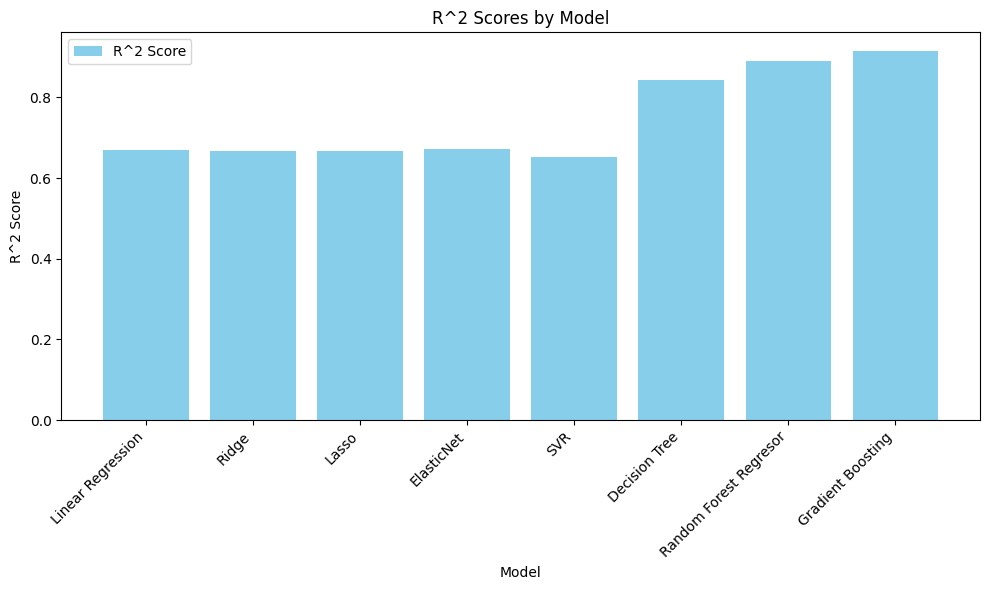

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_positions = np.arange(len(metrics_results['Model']))
ax.bar(bar_positions,
       metrics_results['R2'],
       color='skyblue',
       label='R^2 Score')

ax.set_xlabel('Model')
ax.set_ylabel('R^2 Score')
ax.set_title('R^2 Scores by Model')
ax.set_xticks(bar_positions)  # Explicitly setting tick positions
ax.set_xticklabels(metrics_results['Model'], rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV
import time
import joblib

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 4, 6]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1)

# Measure the time taken for grid search
start_time = time.time()

# Perform grid search
grid_search.fit(X_train, y_train)

# Calculate elapsed time
elapsed_time = time.time() - start_time

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# After finding the best model, save it to a file
best_model_filename = 'best_model_GS.joblib'
joblib.dump(grid_search.best_estimator_, best_model_filename)
#loaded_model = joblib.load('best_model_GS.joblib')

# Predict on test set using the best found model
y_pred = grid_search.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Best Score (MSE): {best_score}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")
print(f"Total time elapsed for Grid Search: {elapsed_time} seconds")
"""
# Plotting the outcome of various parameter sets
results = grid_search.cv_results_
mean_test_scores = -results['mean_test_score']
params = [str(param) for param in results['params']]

plt.figure(figsize=(10, 6))
plt.barh(params, mean_test_scores, color='skyblue')
plt.xlabel('Negative Mean Squared Error')
plt.ylabel('Parameter Set')
plt.title('Performance of Parameter Sets in Grid Search')
plt.show()"""

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
Best Score (MSE): -12.579331231930643
Mean Absolute Error (MAE): 1.768828945927315
Mean Squared Error (MSE): 5.427450486871088
Root Mean Squared Error (RMSE): 2.329688924914888
R^2 Score: 0.9259897655217713
Total time elapsed for Grid Search: 22.067198991775513 seconds


"\n# Plotting the outcome of various parameter sets\nresults = grid_search.cv_results_\nmean_test_scores = -results['mean_test_score']\nparams = [str(param) for param in results['params']]\n\nplt.figure(figsize=(10, 6))\nplt.barh(params, mean_test_scores, color='skyblue')\nplt.xlabel('Negative Mean Squared Error')\nplt.ylabel('Parameter Set')\nplt.title('Performance of Parameter Sets in Grid Search')\nplt.show()"

## Rationale Behind Using Negative Mean Squared Error (Negative MSE) in Grid Search

When performing hyperparameter optimization with grid search in scikit-learn, we often use scoring metrics to evaluate the performance of different parameter combinations. The choice of "Negative Mean Squared Error (Negative MSE)" as a scoring metric might seem counterintuitive at first, but there's a practical reason for its use:

### Optimization Objective

Scikit-learn's grid search (`GridSearchCV`) aims to *maximize* the specified scoring metric. Since many regression metrics (like MSE) are naturally framed as something to minimize (you want the error to be as small as possible), directly using MSE would conflict with the grid search's objective of maximization. To align with this objective, we use negative MSE instead.

### Negative MSE Explained

- **Mean Squared Error (MSE)** measures the average squared difference between the predicted and actual values. A lower MSE indicates a better model fit, as it signifies smaller errors between predicted and actual values.
- **Negative MSE** simply takes the negative of the MSE values. This transformation turns a minimization problem into a maximization one, fitting into the grid search framework where higher scores are better. By using negative MSE, the grid search can operate under its default maximization behavior, selecting the model parameters that yield the highest (least negative) score.

### Implications for Model Selection

By using Negative MSE as the scoring metric, we can efficiently utilize grid search to find the optimal model parameters that minimize the MSE, since grid search will inherently select the parameter set with the highest score (or the least negative MSE, which corresponds to the lowest actual MSE).

In summary, the use of Negative MSE as a scoring metric is a practical workaround that adapts the minimization objective of reducing error into the maximization framework used by scikit-learn's grid search, allowing for straightforward and effective model optimization.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 4, 'max_depth': 4, 'learning_rate': 0.1}
Best Score (MSE): -13.79660240986566
Mean Absolute Error (MAE): 1.9149312428221237
Mean Squared Error (MSE): 7.016245414956372
Root Mean Squared Error (RMSE): 2.6488196267311923
R^2 Score: 0.9043245130335442
Total time elapsed for Random Search: 1.0492496490478516 seconds


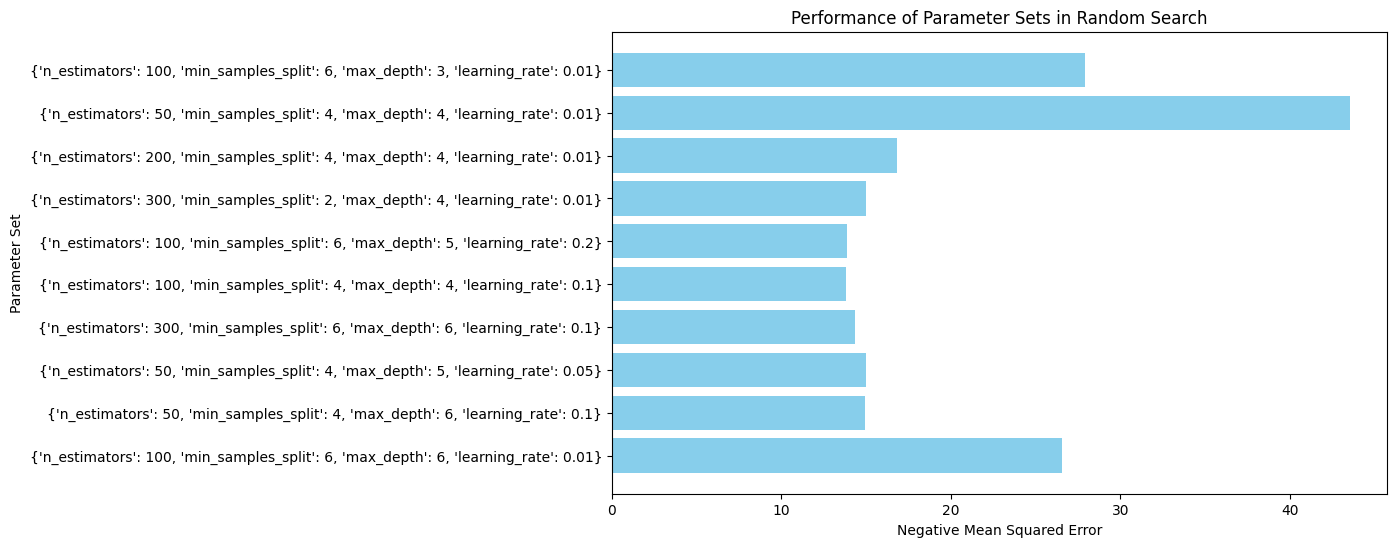

In [25]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 4, 6]
}

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings to sample
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1)

# Measure the time taken for random search
start_time = time.time()

# Perform random search
random_search.fit(X_train, y_train)

# Calculate elapsed time
elapsed_time = time.time() - start_time

# Best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# After finding the best model, save it to a file
best_model_filename = 'best_model_RS.joblib'
joblib.dump(grid_search.best_estimator_, best_model_filename)
#loaded_model = joblib.load('best_model_RS.joblib')

# Predict on test set using the best found model
y_pred = random_search.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Best Score (MSE): {best_score}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")
print(f"Total time elapsed for Random Search: {elapsed_time} seconds")

# Plotting the outcome of various parameter sets
results = random_search.cv_results_
mean_test_scores = -results['mean_test_score']
params = [str(param) for param in results['params']]

plt.figure(figsize=(10, 6))
plt.barh(params, mean_test_scores, color='skyblue')
plt.xlabel('Negative Mean Squared Error')
plt.ylabel('Parameter Set')
plt.title('Performance of Parameter Sets in Random Search')
plt.show()

## Understanding Random Search and Its Difference from Grid Search

Two popular methods for hyperparameter optimization are Grid Search and Random Search. Here's an overview of Random Search, how it operates, and how it contrasts with Grid Search.

### What is Random Search?

Random Search is a hyperparameter optimization technique that selects random combinations of hyperparameter values from a specified range for each hyperparameter. This approach evaluates a fixed number of random combinations by training the model with them and selecting the combination that performs the best based on a chosen performance metric.

### How Random Search Works

1. **Define the Hyperparameter Space:** Unlike Grid Search, which requires explicit lists of values for each hyperparameter, Random Search works with distributions (for continuous hyperparameters) or lists (for categorical hyperparameters) to sample from.
2. **Random Sampling:** It randomly samples combinations of hyperparameters from the defined space.
3. **Model Evaluation:** Each randomly selected combination is used to train a model, and its performance is assessed via cross-validation.
4. **Selection of Best Parameters:** After evaluating a predetermined number of random combinations, the set of hyperparameters yielding the best evaluation metric is chosen.

### Random Search vs. Grid Search

- **Exploration of Hyperparameter Space:** Grid Search systematically explores all possible combinations in the defined hyperparameter grid, which can be computationally expensive and time-consuming, especially with a large number of hyperparameters or large ranges of values. Random Search, on the other hand, samples a subset of combinations, potentially exploring the space more efficiently.
- **Computational Efficiency:** Random Search can be more computationally efficient than Grid Search, particularly when the optimal hyperparameter values lie within a narrow region, because it doesn't waste time evaluating unpromising regions of the space.
- **Performance:** While Grid Search is exhaustive and guaranteed to find the optimal combination in the grid, Random Search has a chance (though not guaranteed) to find a near-optimal combination with far fewer iterations. Studies have shown that Random Search can be surprisingly effective compared to Grid Search, especially in high-dimensional spaces.
- **Flexibility:** Random Search allows for the specification of distributions for continuous hyperparameters, providing a more flexible approach to exploring the hyperparameter space.